In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Dropout, BatchNormalization, GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [4]:
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [14]:
i = Input(shape=x_train[0].shape)

x = Conv2D(filters=32, kernel_size=(3, 3), padding="same", 
           activation=tf.keras.activations.relu)(i)
x = BatchNormalization()(x)
x = Conv2D(filters=32, kernel_size=(3, 3), padding="same", 
           activation=tf.keras.activations.relu)(x)
x = BatchNormalization()(x) 
x = MaxPooling2D(pool_size=(2, 2))(x) 
# x = Dropout(rate=0.2)(x)
x = Conv2D(filters=64, kernel_size=(3, 3), padding="same", 
           activation=tf.keras.activations.relu)(x)         
x = BatchNormalization()(x)
x = Conv2D(filters=64, kernel_size=(3, 3), padding="same", 
           activation=tf.keras.activations.relu)(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)           
# x = Dropout(rate=0.2)(x)
x = Conv2D(filters=128, kernel_size=(3, 3), padding="same", 
           activation=tf.keras.activations.relu)(x)
x = BatchNormalization()(x)
x = Conv2D(filters=128, kernel_size=(3, 3), padding="same", 
           activation=tf.keras.activations.relu)(x)          
x = BatchNormalization()(x)   
x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Dropout(rate=0.2)(x)     

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(rate=0.2)(x)
x = Dense(units=1024, activation=tf.keras.activations.relu)(x)
x = Dropout(rate=0.2)(x)
x = Dense(units=K, activation=tf.keras.activations.softmax)(x)

model = Model(inputs=[i], outputs=[x])

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.sparse_categorical_crossentropy, 
              metrics=["accuracy"])

In [16]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_18 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        1849

In [9]:
r = model.fit(x=x_train, y=y_train, 
          epochs=50, validation_data=(x_test, y_test), 
          use_multiprocessing=True)

Epoch 1/50
1563/1563 [==============================] - 16s 6ms/step - loss: 1.8010 - accuracy: 0.4429 - val_loss: 0.9604 - val_accuracy: 0.6629
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8738 - accuracy: 0.6951 - val_loss: 0.7709 - val_accuracy: 0.7350
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7055 - accuracy: 0.7560 - val_loss: 0.6808 - val_accuracy: 0.7691
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5806 - accuracy: 0.8020 - val_loss: 0.7998 - val_accuracy: 0.7244
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4769 - accuracy: 0.8344 - val_loss: 0.6918 - val_accuracy: 0.7749
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4003 - accuracy: 0.8628 - val_loss: 0.6124 - val_accuracy: 0.8048
Epoch 7/50
1563/1563 [==============================] - 9s 5ms/step - loss: 0.3366 - accuracy: 0.8838 - val_loss: 0.6671 - val_accuracy

In [17]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, 
                                                                 height_shift_range=0.1, 
                                                                 horizontal_flip=True)
train_generator = data_generator.flow(x=x_train, y=y_train, 
                                      batch_size=batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, 
              steps_per_epoch=steps_per_epoch,
              epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
1562/1562 [==============================] - 25s 16ms/step - loss: 1.8583 - accuracy: 0.4097 - val_loss: 1.0581 - val_accuracy: 0.6271
Epoch 2/50
1562/1562 [==============================] - 24s 16ms/step - loss: 1.0396 - accuracy: 0.6369 - val_loss: 0.9113 - val_accuracy: 0.6911
Epoch 3/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.8774 - accuracy: 0.6981 - val_loss: 0.8445 - val_accuracy: 0.7133
Epoch 4/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.7884 - accuracy: 0.7270 - val_loss: 0.7050 - val_accuracy: 0.7610
Epoch 5/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.7057 - accuracy: 0.7565 - val_loss: 0.6294 - val_accuracy: 0.7883
Epoch 6/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.6510 - accuracy: 0.7777 - val_loss: 0.6314 - val_accuracy: 0.7891
Epoch 7/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.6026 - accuracy: 0.7947 - val_loss: 0.6257 -

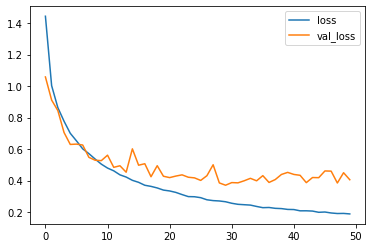

In [18]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

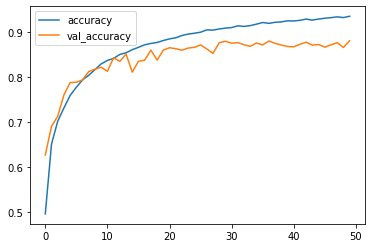

In [19]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

Confusion matrix, without normalization
[[898   7  21  10  11   2   3   4  33  11]
 [  6 950   1   1   0   0   1   0   8  33]
 [ 21   1 841  16  33  17  50  14   4   3]
 [  7   2  42 720  48  71  72  22   7   9]
 [  5   1  23  11 902   4  36  15   1   2]
 [  4   3  27 119  37 757  29  17   1   6]
 [  3   0  18  14  10   2 946   2   4   1]
 [  6   0  11  10  25   8   4 930   3   3]
 [ 24  11   4   2   2   1   5   2 935  14]
 [  5  42   2   2   1   1   4   0   7 936]]


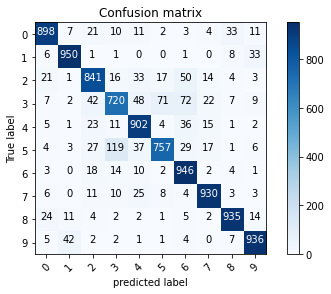

In [20]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, 
                          normalize=False, 
                          title="Confusion matrix", 
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
                 horizontalalignment="center", 
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("predicted label")
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

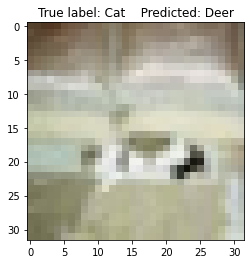

In [22]:
labels = """Airplane
Automobile
Bird
Cat
Deer
Dog
Frog
Horse
Shipo
Truck""".split()

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap="gray")
plt.title("True label: %s    Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()